<a href="https://colab.research.google.com/github/yfhkucing/ComputerVision/blob/master/latihan_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#objective : visualize learning accuracy and evaluate
from sklearn.datasets import make_blobs 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Dense 
from matplotlib import pyplot 

In [3]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2, 
 cluster_std=2, random_state=2)

In [4]:
y = to_categorical(y)
n_train = 800
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
print(train_X.shape, test_X.shape)

(800, 2) (200, 2)


In [5]:
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu')) 
model.add(Dense(3, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', 
 metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 3)                 78        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_X, train_y, validation_data=(test_X, test_y),
 epochs=1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 1s 12ms/step - loss: 3.1898 - accuracy: 0.2675 - val_loss: 2.6970 - val_accuracy: 0.2500
Epoch 2/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.1554 - accuracy: 0.3225 - val_loss: 1.7982 - val_accuracy: 0.3200
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4436 - accuracy: 0.3600 - val_loss: 1.1907 - val_accuracy: 0.3450
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.0266 - accuracy: 0.4313 - val_loss: 0.8771 - val_accuracy: 0.6550
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8644 - accuracy: 0.5888 - val_loss: 0.7727 - val_accuracy: 0.6650
Epoch 6/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.8009 - accuracy: 0.6087 - val_loss: 0.7195 - val_accuracy: 0.6700
Epoch 7/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7630 - accuracy: 0.6263 - val_loss: 0.6848 - val_accuracy: 0.6800
Epoch

In [8]:
_, train_acc = model.evaluate(train_X, train_y)
_, test_acc = model.evaluate(test_X, test_y)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

7/7 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8500
Train: 0.831, Test: 0.850


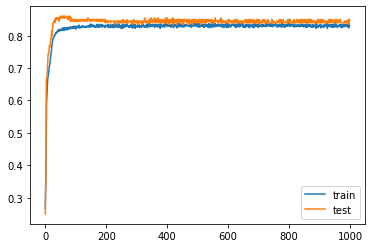

In [9]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()